<a href="https://colab.research.google.com/github/peaceebika/Statistical-Learning/blob/main/Multiple%20Linear%20Regression%20Analysis/Code/Multiple_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


# upload files
uploaded = files.upload()
df = pd.read_csv("/content/Salary_Data.csv")

df.head()

Saving Salary_Data.csv to Salary_Data.csv


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


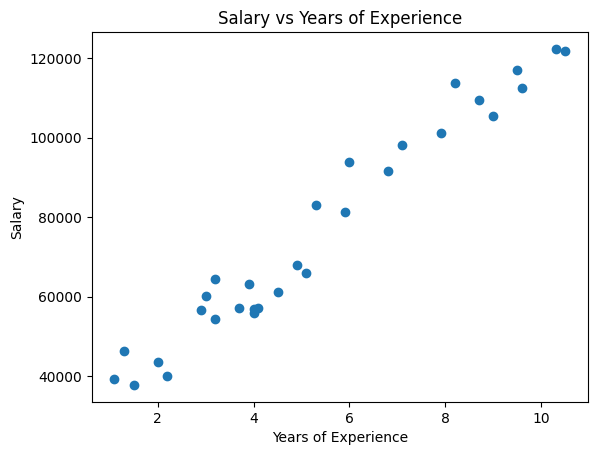

In [ ]:
plt.figure()
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.show()

### **Observations**
The scatter plot shows a positive relationship between years of experience and salary: as experience increases, salary generally increases. The pattern looks approximately linear, meaning a straight line seems to fit the overall trend reasonably well. There are a few points that sit a bit above or below the general pattern (possible mild outliers), and the largest experience values could act as high-leverage points because they are far from the center of the x-values, but nothing looks wildly inconsistent with the overall trend.

In [ ]:
# 2. Fit model
x = df["YearsExperience"]
y = df["Salary"]

X = sm.add_constant(x)          # adds intercept term
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           1.14e-20
Time:                        01:25:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

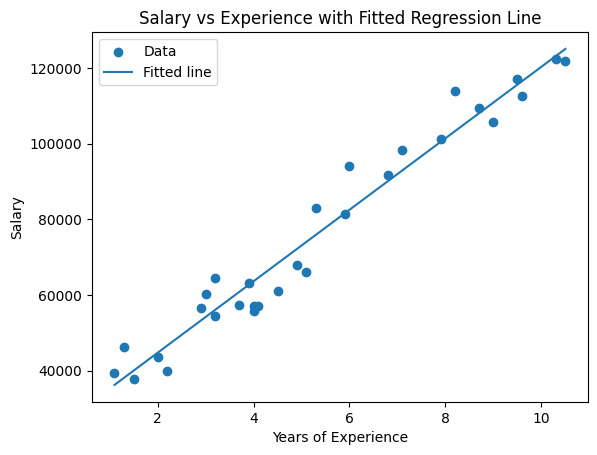

In [ ]:
plt.figure()
plt.scatter(x, y, label="Data")

# regression line
x_line = np.linspace(x.min(), x.max(), 200)
X_line = sm.add_constant(x_line)
y_line = model.predict(X_line)

plt.plot(x_line, y_line, label="Fitted line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience with Fitted Regression Line")
plt.legend()
plt.show()

In [ ]:
intercept = model.params["const"]
slope = model.params["YearsExperience"]
print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 25792.20019866867
Slope: 9449.962321455081


2D. Interpretation (Part 2):

Intercept (~25,792): This is the model’s predicted salary when years of experience = 0. In real life, 0 years may be outside (or near the edge of) the data range, so the intercept is mainly a baseline reference.

Slope (~9,450): For each additional 1 year of experience, the model predicts salary increases by about $9,450 on average.

3A) Correlation

In [ ]:
corr = df["YearsExperience"].corr(df["Salary"])
print("correlation:", corr)

correlation: 0.9782416184887599


In [ ]:
r2 = model.rsquared
print("R-squared:", r2)

R-squared: 0.9569566641435086


**3C) Interpretation of correlation + R²**

Correlation (r ≈ 0.978): Very strong positive linear association: higher experience is strongly associated with higher salary.

R-squared (R² ≈ 0.957): About 95.7% of the variation in salary is explained by years of experience using this linear model (with the remaining ~4.3% due to other factors and noise).

**4: 95% Confidence Intervals**

In [ ]:
model.conf_int(alpha=0.05)

,0,1
const,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


**4B) Interpretation of CIs**

Interpretation (Part 4):

We are 95% confident the true (population) intercept lies between about $21,136 and $30,448.

We are 95% confident the true (population) slope lies between about $8,674 and $10,226, meaning the average salary increase per year of experience is likely within that range.

**5: Hypothesis Test + Final Conclusion**

In [ ]:
p_value_slope = model.pvalues["YearsExperience"]
print("p_value_slope", p_value_slope)

p_value_slope 1.1430681092271316e-20


**5B) Decision + conclusion**

Decision (α = 0.05):
Because p-value < 0.05, we reject H₀.

Conclusion:
There is strong statistical evidence that years of experience is a useful predictor of salary. In this dataset, salary increases by roughly $9,450 per additional year of experience on average.

**Part 6: Discussion — Potential Problems in Linear Regression**

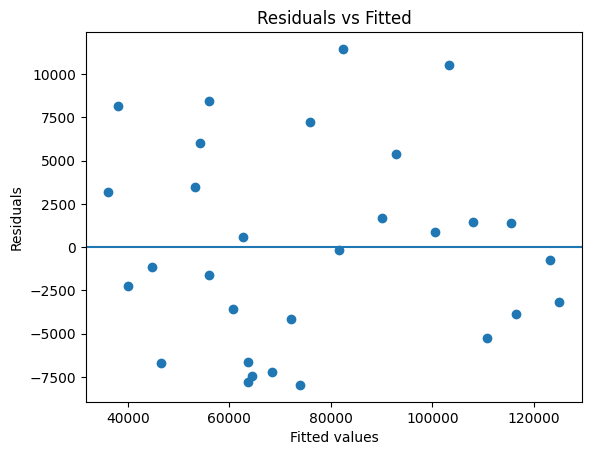

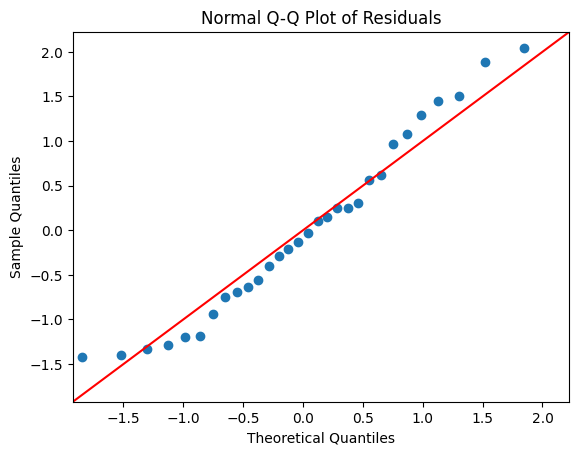

In [ ]:
fitted = model.fittedvalues
resid = model.resid

# Residuals vs Fitted (checks linearity + constant variance)
plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Normal Q-Q plot (checks normality of errors)
sm.qqplot(resid, line="45", fit=True)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [ ]:
# Outliers + leverage check
influence = model.get_influence()
summary_frame = influence.summary_frame()

df_diag = df.copy()
df_diag["leverage"] = summary_frame["hat_diag"]
df_diag["cooks_d"] = summary_frame["cooks_d"]
df_diag["std_resid"] = summary_frame["standard_resid"]

df_diag.sort_values("cooks_d", ascending=False).head(10)

,YearsExperience,Salary,leverage,cooks_d,std_resid
23,8.2,113812.0,0.069012,0.131755,1.885422
1,1.3,46205.0,0.102297,0.125146,1.482031
19,6.0,93940.0,0.035352,0.074303,2.013697
8,3.2,64445.0,0.052456,0.061710,1.493121
4,2.2,39891.0,0.074835,0.058415,-1.201813
25,9.0,105582.0,0.091527,0.045787,-0.953380
11,4.0,55794.0,0.040719,0.040155,-1.375501
13,4.1,57081.0,0.039637,0.035654,-1.314434
6,3.0,60150.0,0.056247,0.034017,1.068420
16,5.1,66029.0,0.033528,0.033924,-1.398484


**6C) Discussion paragraph**

Discussion for (Part 6):
A few issues can affect how valid this linear regression model is. First, linearity: the relationship should be roughly a straight line; if the scatter plot or residual plot shows a curve, the linear model may be misspecified. Second, correlation of error terms: if data are collected over time or in clusters, residuals might not be independent, which can make p-values unreliable. Third, constant variance (homoscedasticity): residual spread should be about the same across fitted values; if residuals fan out, it suggests heteroscedasticity. Fourth, outliers can distort the fitted line if extreme points pull the model. Fifth, high-leverage points (very large or small x-values) can strongly influence the slope even if they are not outliers in y. Finally, the model often assumes residuals are normally distributed with mean 0; if the Q-Q plot shows strong departures, confidence intervals and hypothesis tests may be less accurate (especially with small samples).

(In this dataset, the highest experience values can be higher-leverage because they are far from the center of x, but Cook’s distance is not extremely large—still, it’s worth mentioning.)